# Панова Мария 428 группа. Вариант 21

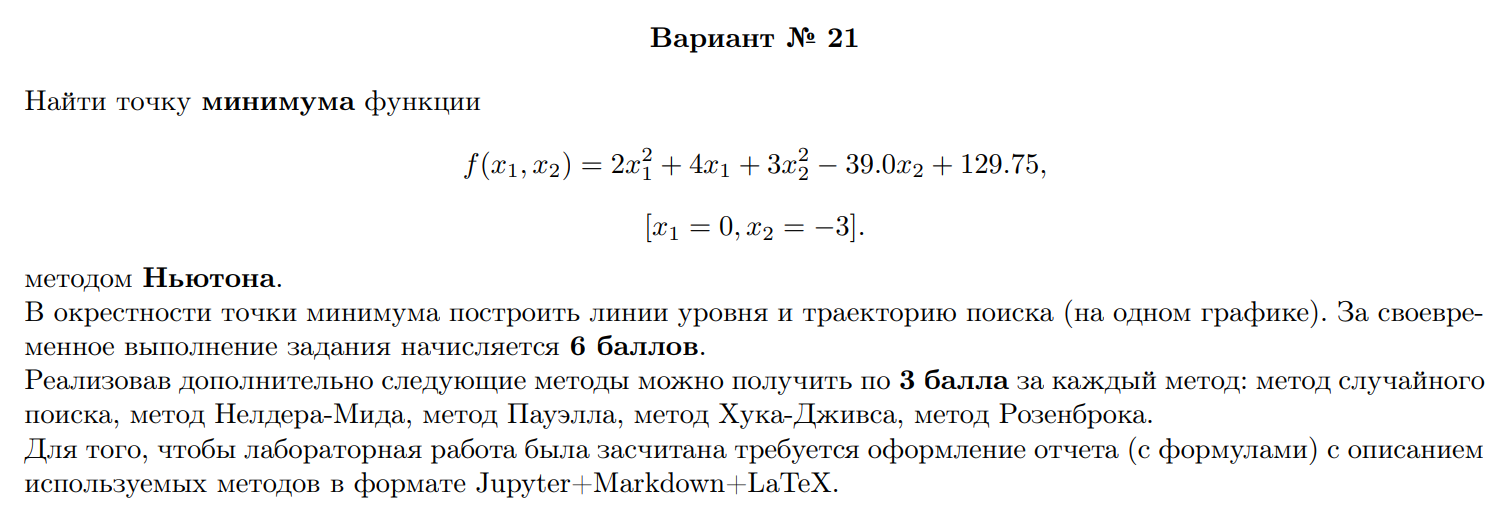

# Метод Ньютона

Для получения итерационной формулы этого метода используем следующие эвристические соображения.
#### Эвристические соображения. 
В градиентном методе основой является идея локальной линейной аппроксимации минимизируемой функции $f(x)$. Если же функция дважды дифференцируема, то естественно попытаться использовать ее квадратичную аппроксимацию в точке $x^k$, т. е. функцию 
$$f_k(х) = f(x^k) + (∇f(x^k), x-x^k) + (∇^2f(x^k)(x-x^k), x-x^k)/2.\; (1)$$
В градиентном методе следующее приближение $x^{k+1}$ искалось из условия минимума линейной аппроксимации при дополнительных ограничениях на близость к $х^к$ (так как линейная функция не достигает минимума на всем пространстве). Для квадратичной аппроксимации можно попытаться не накладывать таких ограничений, так как при $∇^2f(x^k)>0$ функция $f_k(x)$ достигает безусловного минимума.
Выберем точку минимума $f_k(x)$ в качестве нового приближения:
$$x^{k+1} = argmin\, f_k(х),\; x∈R^n$$
Таким образом, мы получаем метод
$$x^{k+1}=x^k-[∇^2f(x^k)]^{-1} ∇f(x^k). \;  (2)$$
К этому методу можно прийти и из несколько иных соображений. Точка минимума должна быть решением системы n уравнений с n переменными
$$∇f(x)>0.\;   (3)$$
Одним из основных методов решения таких систем является
*метод Ньютона*, заключающийся в *линеаризации* уравнений в
точке xk и решении линеаризованной системы.
Эта линеаризованная система в данном случае имеет вид
$$∇f(x^k) - ∇^2f(x^k)(x-x^k)=0.\;   (4)$$
и ее решение $x^{k+1}$ дается формулой (2).

*(Вернёмся к описанию метода)*

Запишем для функции $f(x)$ в окрестности точки $x^k$ формулу Тейлора 2-го порядка

$$f(x) =Q_k(x) +o(∥x−x^k∥^2),∥x−x^k∥→0;$$

$$Q_k(x) =f(x^k)+(∇f(x^k),(x−x^k))+{1\over2}(∇^2f(x^k)(x−x^k),(x−x^k)).\;  (10)$$

В случае, когда гессиан $∇^2f(x^k)$ положительно определен, квадратичная функция $Q_k(x)$ достигает глобального минимума в точке 

$$x^{k+1}=x^k−[∇^2f(x^k)]^{−1}∇f(x^k),\;  (11)$$

$(∇Q_k(x^{k+1}) = 0)$. Если точка $x^{k+1}$ достаточно близка к $x^k$, то в силу (10) справедливо неравенство

$$f(x^{k+1}) < f(x^k),$$

т.е. $x^{k+1}$ естественно взять следующим за $x^k$ приближением к реше-нию задачи $f(x) \rightarrow min, x \in R^n.$ . Формула (11) и есть итерационная формула методаНьютона. Таким образом, в этом методе $α_k = 1$,

$$p^k=−[∇^2f(x^k)]^{−1}∇f(x^k). \; (12)$$

Практически $p^k$ удобнее искать не по формуле (3), а решая систему линейных уравнений 

$$[∇^2f(x^k)]p^k=−∇f(x^k). \; (13)$$

одним из прямых или итерационных методов, исключая тем самым операцию обращения матрицы Гессе. Отметим, что для квадратичной функции $f(x)$ метод Ньютона сходится за один шаг. Для достаточно гладкой функции $f(x)$ с положительно определенной матрицей Гессе при удачном выборе начального приближения $x^0$ итерационная последовательность ${x^k}$ метода Ньютона сходится к точке минимума с квадратичной скоростью. Однако, найти удачное начальное приближение - задача довольно сложная, требующая определенного искусства. Модифицируя метод Ньютона введением переменного множителя $α_k$, получают методы спуска, сходящиеся при любом начальном приближении $x^0$.

In [4]:
import pylab
import numpy as np
import random as r

In [5]:
def F(x, y):
    return 2*x**2 + 4*x + 3*y**2 - 39.0*y + 129.75

In [6]:
x1 = 0
x2 = -3

In [7]:
def F_x1(x):
    return 4*x + 4

In [8]:
def F_x2(x):
    return 6*x - 39.0

Значения производных второго порядка

In [9]:
f2_x1 = 4 
f2_x2 = 6 
f2_x = 0
H = [[f2_x1,f2_x],[f2_x,f2_x2]]

In [10]:
def Ges():
    H = [[f2_x1,f2_x],[f2_x,f2_x2]]
    return np.linalg.det(H)

In [11]:
def pk(x1,x2):
    A = np.array(H)
    B = [F_x1(x1),F_x2(x2)]
    C = - np.linalg.solve(A,B)
    return C

In [12]:
X1 = [0,-1.5]
X2 = [-3,-1.5]
i = 0
E = 0.001
XX = [X1[0]]
YY = [X1[1]]
while abs(X2[0] - X1[0]) > E:     
    i += 1
    X1 = X2
    X2 = X1 + pk(X1[0],X1[1])
    XX.append(X2[0])
    YY.append(X2[1])
    

In [13]:
print("Гессиан :",Ges())
print('min(0,-3) =',(XX[-1],YY[-1]))   
print('F(min(x1,x2)) =',F(XX[-1],YY[-1]))
print('Итераций :',i)

Гессиан : 23.999999999999993
min(0,-3) = (-1.0, 6.5)
F(min(x1,x2)) = 1.0
Итераций : 2


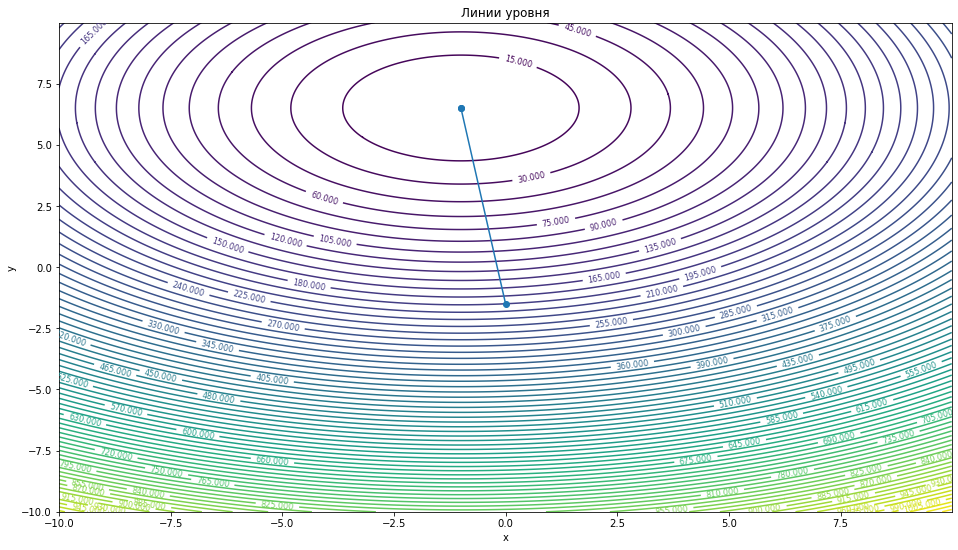

In [14]:
x = [i/100 for i in range(-1000,1000)]
y = [i/100 for i in range(-1000,1000)]
X, Y = np.meshgrid(x, y)
Z = 2*X**2 + 4*X + 3*Y**2 - 39*Y + 129.75
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS=pylab.contour(X, Y, Z,100)
pylab.clabel(CS, fontsize = 8)
pylab.plot(XX, YY, 'o-')
pylab.show()

# Метод случайного поиска

Пусть стоит задача найти минимум функции двух переменных $f(x, y)$.
1. Задается начальная точка $x_0, y_0$,начальная длина шага по плоскости $h$ и точность $\varepsilon$;
2. С помощью генератора случайных чисел выбирается случайное направление на плоскости;
3. Делается шаг $h$ в этом направлении и вычисляется функционал в новой точке;
4. Если значение функции возросло, то остаемся в начальной точке, шаг немного уменьшается (1-10%) и снова выбирается случайное направление и проверяется значение функции в новой точке;
5. Если значение в новой точке уменьшилось, то шаг немного увеличивается (на 1-10%) и из новой точки делается шаг в том же направлении, и т.д. до тех пор, пока в последней точке не будет найдено ни одного направления ведущего к уменьшению функции, при этом длина шага будет все время уменьшаться (на 1-10%) пока не достигнет $\varepsilon$-окрестности 0.

In [24]:
def F(x):
    return 2*x[0]**2 + 4*x[0] + 3*x[1]**2 - 39.0*x[1] + 129.75

In [25]:
x = np.array([0,-3])
r.seed()

def random_poisk(F, x, h = 1):
    
    t = [x]
    i = 0
    v = np.array([-1 + r.random()*2, -1 + r.random()*2]) # Задаём направление

    while h >= E:
        i += 1
        koef = h / np.linalg.norm(v) 
        x1 = x + koef*v # Вычисляем координаты новой точки
        if F(x1) > F(x):
            h = 0.5*h
            v = np.array([-1 + r.random()*2, -1 + r.random()*2])
        else:
            h = 1.5*h
            x = x1
            t = np.append(t, [x1], axis=0)
    print("Random search:\nf_min: {0}\nx_min: {1}\nIteration: {2}".format(F(x1), x1, i))
    return t        

Random search:
f_min: 1.0000442042681925
x_min: [-1.00009231  6.50383785]
Iteration: 49


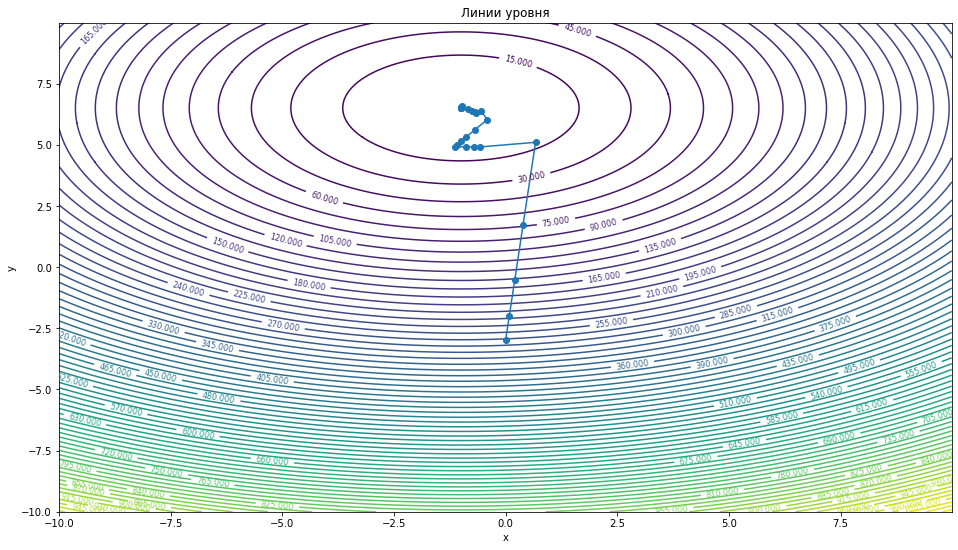

In [26]:
t = random_poisk(F, x)

x = [i/100 for i in range(-1000,1000)]
y = [i/100 for i in range(-1000,1000)]
X, Y = np.meshgrid(x, y)
Z = 2*X**2 + 4*X + 3*Y**2 - 39*Y + 129.75
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS = pylab.contour(X, Y, Z,100)
XX = []; YY = []
for i in t:
    XX.append(i[0])
    YY.append(i[1])
pylab.clabel(CS, fontsize = 8)
pylab.plot(XX, YY, 'o-')
pylab.show()

# Метод Нелдера-Мида

**Начальный этап**

Выбрать точки $x_1,\ldots,x_{n+1}$, образующие симплекс в $E_n$, коэффициент растяжения $\gamma > 1$, коэффициент сжатия $\beta > 0$ и коэффициент отражения $\alpha > 0$. Перейти к основному этапу. 

**Основной этап**

1. Положить $x_r, x_s \in \{ x_1, \ldots, x_{n+1} \}$ такими, что
$$f(x_r) = \min\limits_{1 \leq j \leq n+1} f(x_j), \hspace{5mm} f(x_s) = \max\limits_{1 \leq j \leq n+1} f(x_j).$$  
   Положить $\bar{x} = \frac{1}{n} \sum_{j \ne s} x_j$ и перейти к шагу 2.

2. Положить $\hat{x} = \bar{x} + \alpha (\bar{x} - x_s)$. Если $f(x_r) > f(\hat{x})$, то положить $x_1 = \bar{x} + \gamma (\hat{x} - \bar{x})$ и перейти к шагу 3. В противном случае перейти к шагу 4.

3. Точку $x_s$ заменить на $x_1$, если $f(\hat{x}) > f(x_1)$, и на $\hat{x}$, если $f(\hat{x}) \leq f(x_1)$, что дает новое множество из $n+1$ точек. Перейти к шагу 1.

4. Если $\max\limits_{1 \leq j < n+1} \{f(x_j) : j \ne s \} \geq f(\hat{x})$, то $x_s$ заменить на $\hat{x}$, получить новое множество из $n+1$ точек и перейти к шагу 5.

5. Взять $x'$, для которого $f(x') = \min \{ f(\hat{x}), f(x_s) \}$, и положить $x'' = \bar{x} + \beta (x' - \bar{x})$. Если $f(x'') > f(x')$, то заменить $x_j$ на $x_j + (1/2)(x_r - x_j)$ для $j = 1, \ldots, n+1$ и перейти к шагу 1. Если $f(x'') \leq f(x')$, то заменить $x_s$ на $x''$, получить новое множество из $n+1$ точек и перейти к шагу 1. 

In [18]:
points=[]

def method_NM(F, x, alpha = 1, beta = 0.5, gamma = 2, m = 50):
    
    v1 = x[0]
    v2 = x[1]
    v3 = x[2]
    
    for i in range(m):
        adict = {(v1[0], v1[1]):F(v1), (v2[0], v2[1]):F(v2), (v3[0], v3[1]):F(v3)}
        p = sorted(adict.items(), key = lambda x: x[1])
        
        b = np.array(p[0][0])
        g = np.array(p[1][0])
        w = np.array(p[2][0])
        
        mid = (g + b)/2
        
        # Отражение
        xr = mid + alpha * (mid - w)
        if F(xr) < F(g):
            w = xr
        else:
            if F(xr) < F(w):
                w = xr
            c = (w + mid)/2
            if F(c) < F(w):
                w = c
        
        # Растяжение
        if F(xr) < F(b):
            xe = mid + gamma * (xr - mid)
            if F(xe) < F(xr):
                w = xe
            else:
                w = xr
        
        # Сжатие
        if F(xr) > F(g):
            xc = mid + beta * (w - mid)
            if F(xc) < F(w):
                w = xc
        
        v1 = w
        v2 = g
        v3 = b
        points.append([b[0], b[1]])
    print("The Nelder-Meade method:\nf_min: {0}\nx_min: {1}\nIteration: {2}".format(F(b), [b[0], b[1]], i))

The Nelder-Meade method:
f_min: 1.0
x_min: [-1.0000000391638975, 6.500000065758858]
Iteration: 49


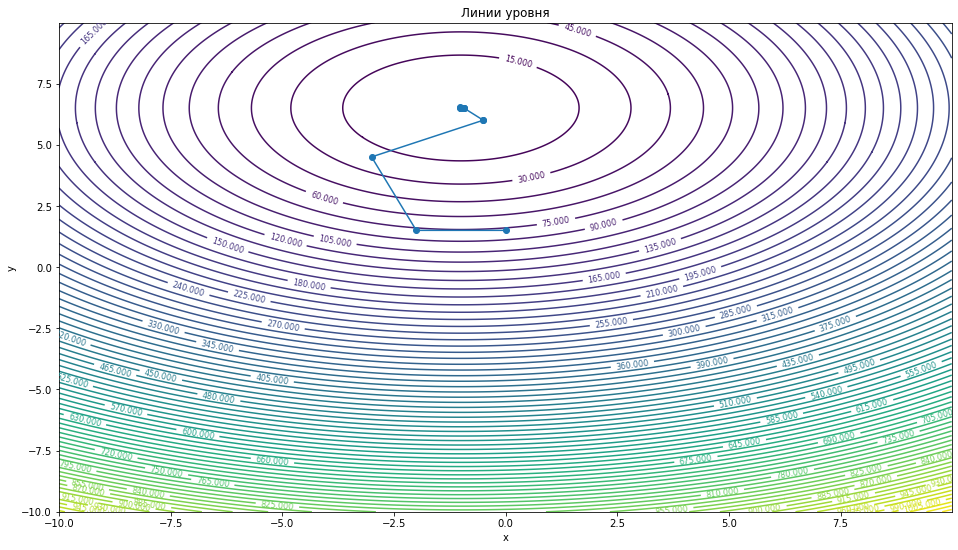

In [19]:
x0 = np.array([[0, 0], [2, 0], [0, 1.5]])
method_NM(F, x0)

x = [i/100 for i in range(-1000,1000)]
y = [i/100 for i in range(-1000,1000)]
X, Y = np.meshgrid(x, y)
Z = 2*X**2 + 4*X + 3*Y**2 - 39*Y + 129.75
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS = pylab.contour(X, Y, Z,100)
XX = []; YY = []
for i in points:
    XX.append(i[0])
    YY.append(i[1])
pylab.clabel(CS, fontsize = 8)
pylab.plot(XX, YY, 'o-')
pylab.show()

# Метод Хука-Дживса

Выбрать число $\varepsilon > 0$ для остановки алгоритма. Выбрать начальную точку $x_1$, положить $y_1 = x_1$, $k = j = 1$ и перейти к основному этапу.
1. Вычислить $\lambda_j$ -- оптимальное решение задачи минимизации $f(y_j + \lambda d_j)$ при условии $\lambda \in E_1$ и положить $y_{j+1} = y_j + \lambda_j d_j$. Если $j < n$, то заменить $j$ на $j+1$ и повторить шаг 1. Если $j = n$, то положить $x_{k+1} = y_{n+1}$. Если $\Vert x_{k+1} - x_k\Vert < \varepsilon$, то остановится; в противном случае перейти к шагу 2

2. Положить $d = x_{k+1} - x_k$ и найти $\hat{\lambda}$ -- оптимальное решение задачи минимизации $f(x_{k+1} + \lambda d)$ при условии $\lambda \in E_1$. Положить $y_1 = x_{k+1} +\hat{\lambda} d$, $j=1$, заменить $k$ на $k+1$ и перейти к шагу 1. 


In [22]:
x0 = np.array([0,-3])
def method_HJ (f, x, h = 2, a = 10, E = 0.000001):
    
    x0 = x
    i = 0
    tp = [x0]
    
    def research(x0, h): 
        
        x1 = x0
        while h >= E:
            if f([x1[0] + h, x1[1]]) < f(x1):
                x1 = np.array([x1[0] + h, x1[1]])
            elif f([x1[0] - h, x1[1]]) < f(x1):
                x1 = np.array([x1[0] - h, x1[1]])

            if f([x1[0], x1[1] + h]) < f(x1):
                x1 = np.array([x1[0], x0[1] + h])
            elif f([x1[0], x1[1] - h]) < f(x1):
                x1 = np.array([x1[0], x1[1] - h])

            if f(x1) >= f(x0):
                h /= a
            else:
                break
        
        return x1, h

    x1, h = research(x0, h)
    tp = np.append(tp, [x1], axis=0)
    
    while h >= E:
        i += 1
        p = x0 + 2*(x1 - x0) 
        p1, h = research(p, h)
        
        if f(p1) < f(x1):
            x1 = p1
            x0 = x1
        elif h < E:
            break
            
        tp = np.append(tp, [x1], axis=0)
    
    print("Hooke-Jeeves algorithm:\nf_min: {0}\nx_min: {1}\nIteration: {2}".format(f(x1), x1, i))
    return tp


Hooke-Jeeves algorithm:
f_min: 1.0
x_min: [-1.   6.5]
Iteration: 14


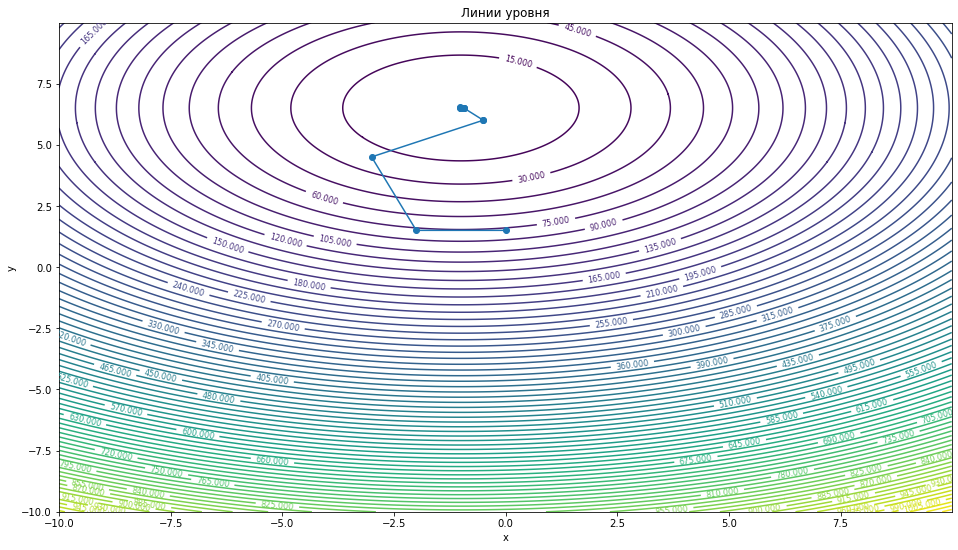

In [23]:
tp = method_HJ(F, x0)

x = [i/100 for i in range(-1000,1000)]
y = [i/100 for i in range(-1000,1000)]
X, Y = np.meshgrid(x, y)
Z = 2*X**2 + 4*X + 3*Y**2 - 39*Y + 129.75
pylab.figure(figsize = (16, 9))
pylab.title('Линии уровня')
pylab.xlabel('x')
pylab.ylabel('y')
CS = pylab.contour(X, Y, Z,100)
XX = []; YY = []
for i in points:
    XX.append(i[0])
    YY.append(i[1])
pylab.clabel(CS, fontsize = 8)
pylab.plot(XX, YY, 'o-')
pylab.show()